In [459]:

import pandas as pd
import numpy as np
import math
from pandas.api.types import is_datetime64_any_dtype as is_datetime

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics 
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,f1_score

from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler  

import seaborn as sns
from matplotlib import pyplot as plt
from xgboost import plot_tree
from sklearn import tree
import graphviz

import warnings
warnings.filterwarnings('ignore')

In [460]:
data = pd.read_csv("C:\\Users\\BOOK\\Documents\\DataScience_Project\\Project 3 - Healthcare - Predictive Analytics\\Project 3 - Healthcare - Predictive Analytics\\Dataset\\cardio_data.csv")

In [461]:
data.head(5)

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


In [462]:
data.tail(5)

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
69995,03-04-2018,Singapore,99993,1,19240,0,120,80,1,2,1,168,Doctor,1,76.0,0
69996,12-01-2022,Malaysia,99995,1,22601,0,140,90,2,1,2,158,Accountant,0,126.0,1
69997,25-08-2022,Malaysia,99996,0,19066,1,180,90,3,2,1,183,Accountant,0,105.0,1
69998,13-07-2020,Singapore,99998,0,22431,0,135,80,1,1,2,163,Accountant,0,72.0,1
69999,15-01-2018,Singapore,99999,1,20540,0,120,80,2,1,1,170,Teacher,0,72.0,0


In [463]:

data.columns

Index(['date', 'country', 'id', 'active', 'age', 'alco', 'ap_hi', 'ap_lo',
       'cholesterol', 'gender', 'gluc', 'height', 'occupation', 'smoke',
       'weight', 'disease'],
      dtype='object')

In [464]:
data.shape

(70000, 16)

In [465]:
data.size

1120000

In [466]:
data.dtypes

date            object
country         object
id               int64
active           int64
age              int64
alco             int64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gender           int64
gluc             int64
height           int64
occupation      object
smoke            int64
weight         float64
disease          int64
dtype: object

In [467]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


# statatics analysis of the numerical data 
    

In [468]:

data.describe(include=[np.number]).round()

,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0
mean,49972.0,1.0,19469.0,0.0,129.0,97.0,1.0,1.0,1.0,164.0,0.0,74.0,0.0
std,28851.0,0.0,2467.0,0.0,154.0,188.0,1.0,0.0,1.0,8.0,0.0,14.0,1.0
min,0.0,0.0,10798.0,0.0,-150.0,-70.0,1.0,1.0,1.0,55.0,0.0,10.0,0.0
25%,25007.0,1.0,17664.0,0.0,120.0,80.0,1.0,1.0,1.0,159.0,0.0,65.0,0.0
50%,50002.0,1.0,19703.0,0.0,120.0,80.0,1.0,1.0,1.0,165.0,0.0,72.0,0.0
75%,74889.0,1.0,21327.0,0.0,140.0,90.0,2.0,2.0,1.0,170.0,0.0,82.0,1.0
max,99999.0,1.0,23713.0,1.0,16020.0,11000.0,3.0,2.0,3.0,250.0,1.0,200.0,1.0


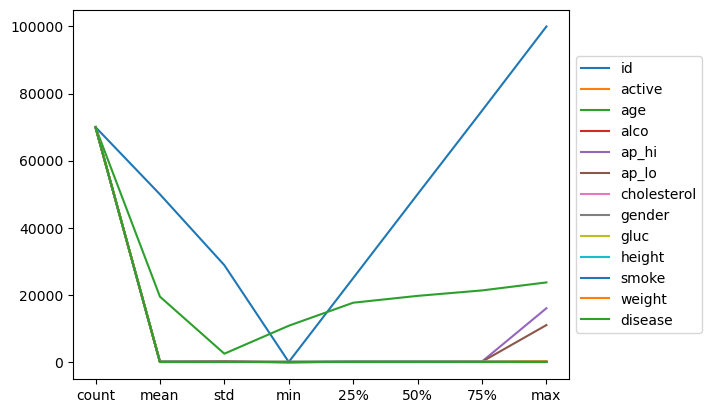

In [469]:
data.describe().plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ---- Data Inspection and Data Cleaning

In [470]:
data.isnull().any()

date           False
country        False
id             False
active         False
age            False
alco           False
ap_hi          False
ap_lo          False
cholesterol    False
gender         False
gluc           False
height         False
occupation     False
smoke          False
weight         False
disease        False
dtype: bool

In [471]:
data.isnull().sum()*100/len(data)

date           0.0
country        0.0
id             0.0
active         0.0
age            0.0
alco           0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gender         0.0
gluc           0.0
height         0.0
occupation     0.0
smoke          0.0
weight         0.0
disease        0.0
dtype: float64

In [472]:
data.loc[data.duplicated()].any()

date           False
country        False
id             False
active         False
age            False
alco           False
ap_hi          False
ap_lo          False
cholesterol    False
gender         False
gluc           False
height         False
occupation     False
smoke          False
weight         False
disease        False
dtype: bool

In [473]:
 # checking the age column in the data
    
data['age'] 

0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
69995    19240
69996    22601
69997    19066
69998    22431
69999    20540
Name: age, Length: 70000, dtype: int64

In [474]:
#converting Age column to the right age format (year) 
year = 365
data['age'] = data['age'].apply(lambda x: math.trunc(x / year))



In [475]:
data['age']

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int64

In [476]:
# changing the date format from object to datetime

In [477]:
data['date'] = pd.to_datetime(data['date'], dayfirst=True)

In [478]:
data.dtypes

date           datetime64[ns]
country                object
id                      int64
active                  int64
age                     int64
alco                    int64
ap_hi                   int64
ap_lo                   int64
cholesterol             int64
gender                  int64
gluc                    int64
height                  int64
occupation             object
smoke                   int64
weight                float64
disease                 int64
dtype: object

In [479]:
data.loc[1:3]

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
1,2021-08-05,Malaysia,1,1,55,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,2022-11-13,Indonesia,2,0,51,0,130,70,3,1,1,165,Chef,0,64.0,1
3,2018-10-31,Singapore,3,1,48,0,150,100,1,2,1,169,Lawyer,0,82.0,1


In [480]:
# counting the age range

cats = pd.qcut(data['age'], 5, precision=0)
pd.value_counts(cats)


age
(28.0, 47.0]    16181
(47.0, 52.0]    15091
(55.0, 59.0]    14278
(59.0, 64.0]    13050
(52.0, 55.0]    11400
Name: count, dtype: int64

In [481]:
# checking data column

dat_column = [dat for dat in data if is_datetime(data[dat])]
print(f' Date columns -',[len(dat_column)])
print({*dat_column}, sep = ",")



 Date columns - [1]
{'date'}


#        # Exploratory  Data Analysis

In [482]:
# Analysis  with Crosstab

pd.crosstab(data['disease'], data['smoke'],margins =True)

smoke,0,1,All
disease,,,
0,31781,3240,35021
1,32050,2929,34979
All,63831,6169,70000


In [483]:
pd.crosstab(data['disease'], data['alco'],margins =True)

alco,0,1,All
disease,,,
0,33080,1941,35021
1,33156,1823,34979
All,66236,3764,70000


In [484]:
# dropping some columns
data = data.drop(columns=['date','id'],axis = 1)

<Axes: >

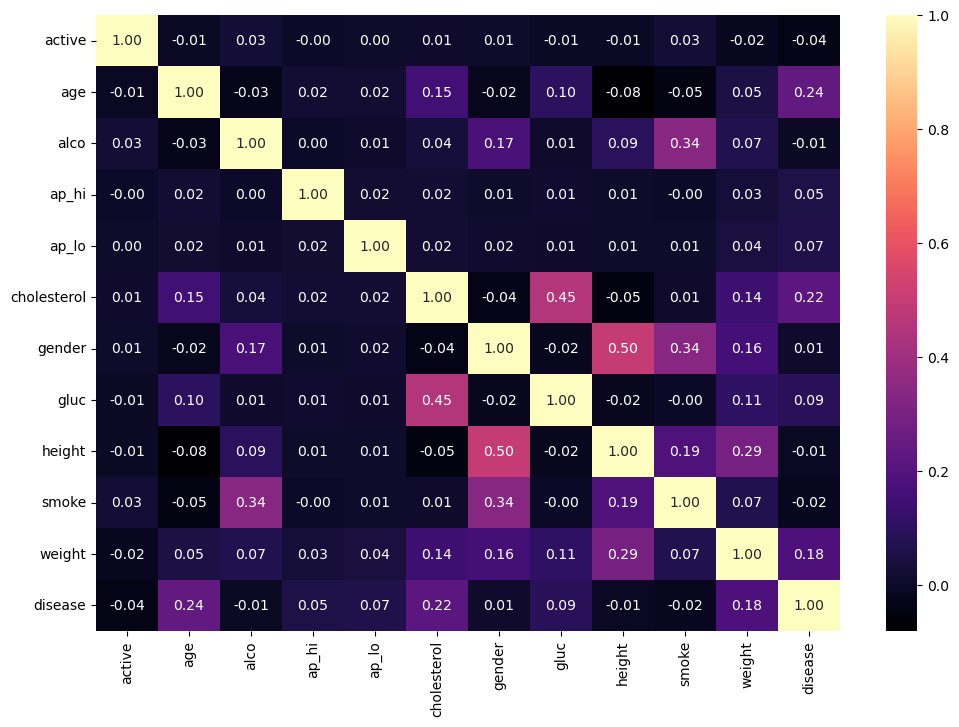

In [485]:
data_num = data.select_dtypes(include = ['float','int'])
plt.figure(figsize=(12,8))
sns.heatmap(data_num.corr(),annot=True,cmap="magma",fmt='.2f')

In [486]:
# Check the Categorical and Numerical Columns.


In [487]:
# Categorical columns
cat_col = [col for col in data.columns if data[col].dtype == 'object']
print('Categorical columns :',cat_col)

# Numerical columns
num_col = [col for col in data.columns if data[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['country', 'occupation']
Numerical columns : ['active', 'age', 'alco', 'ap_hi', 'ap_lo', 'cholesterol', 'gender', 'gluc', 'height', 'smoke', 'weight', 'disease']


In [488]:
# Check the total number of Unique Values in the Categorical Columns

data[cat_col].nunique()
# Check the total number of Unique Values in the numberical Columns

data[num_col].nunique()

active           2
age             28
alco             2
ap_hi          153
ap_lo          157
cholesterol      3
gender           2
gluc             3
height         109
smoke            2
weight         287
disease          2
dtype: int64

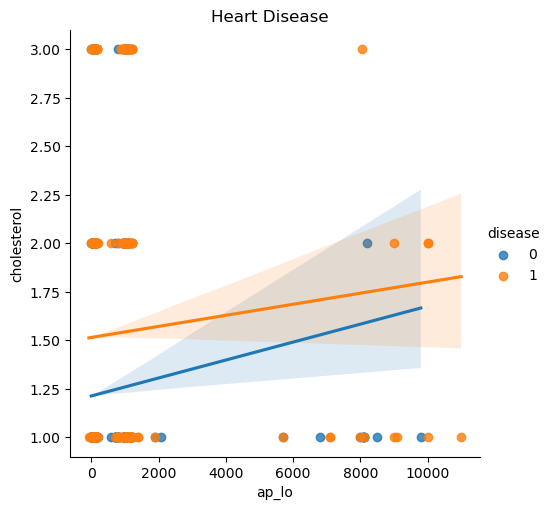

In [489]:
sns.lmplot(x='ap_lo', y='cholesterol', hue='disease', data=data)
# title
plt.title('Heart Disease  ')
plt.show()   

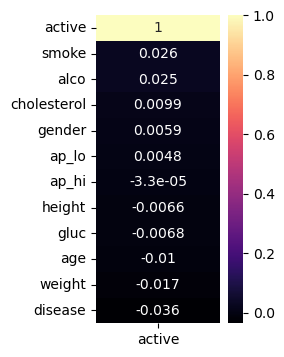

In [490]:
active_sort = data_num.corr()[['active']].sort_values(by='active',ascending=False)
plt.figure(figsize=(2,4))
corr = sns.heatmap(active_sort, annot=True, cmap='magma', cbar=True)


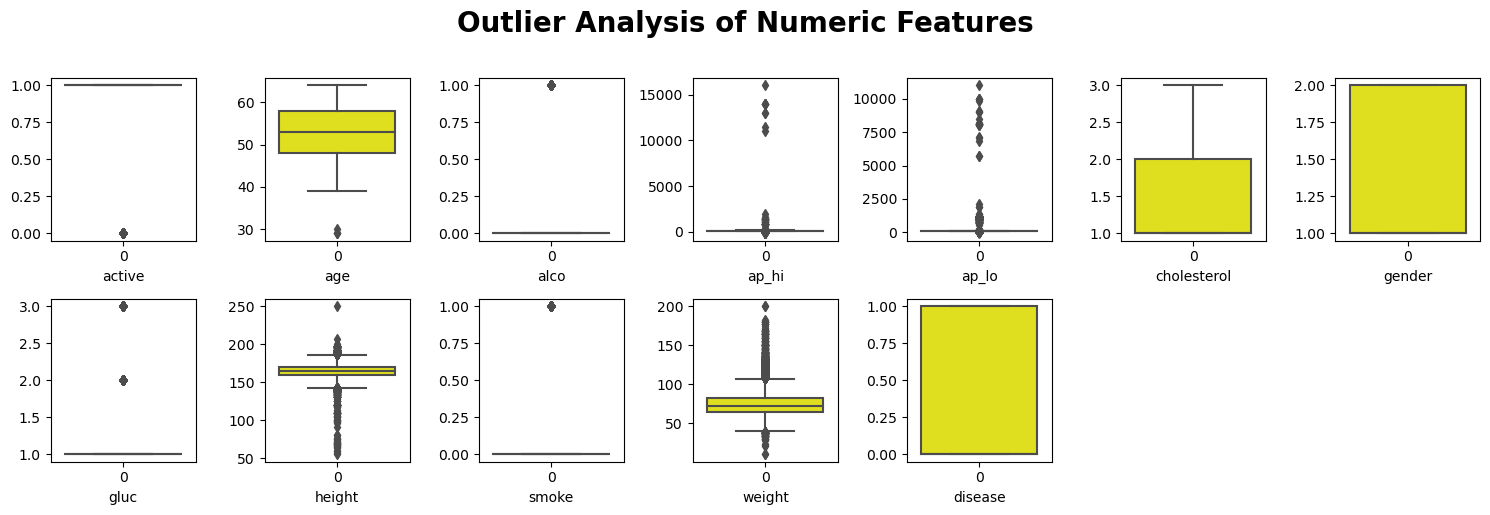

In [491]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Outlier Analysis of Numeric Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(num_col):
  plt.subplot(2, 7, i+1)                       
  
  # boxplots
  sns.boxplot(data[col],color= "Yellow")
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()
     

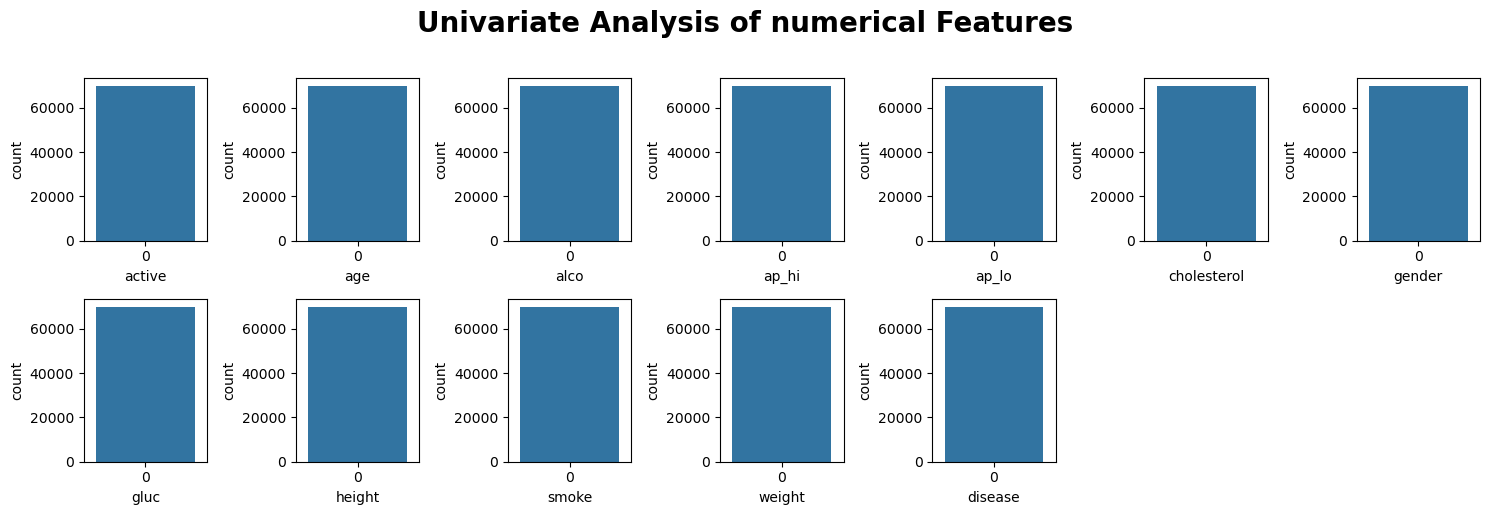

In [492]:
 
plt.figure(figsize=(15,5))
# title
plt.suptitle('Univariate Analysis of numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(num_col):
  plt.subplot(2, 7, i+1)           

  # countplot
  sns.countplot(data[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()
     

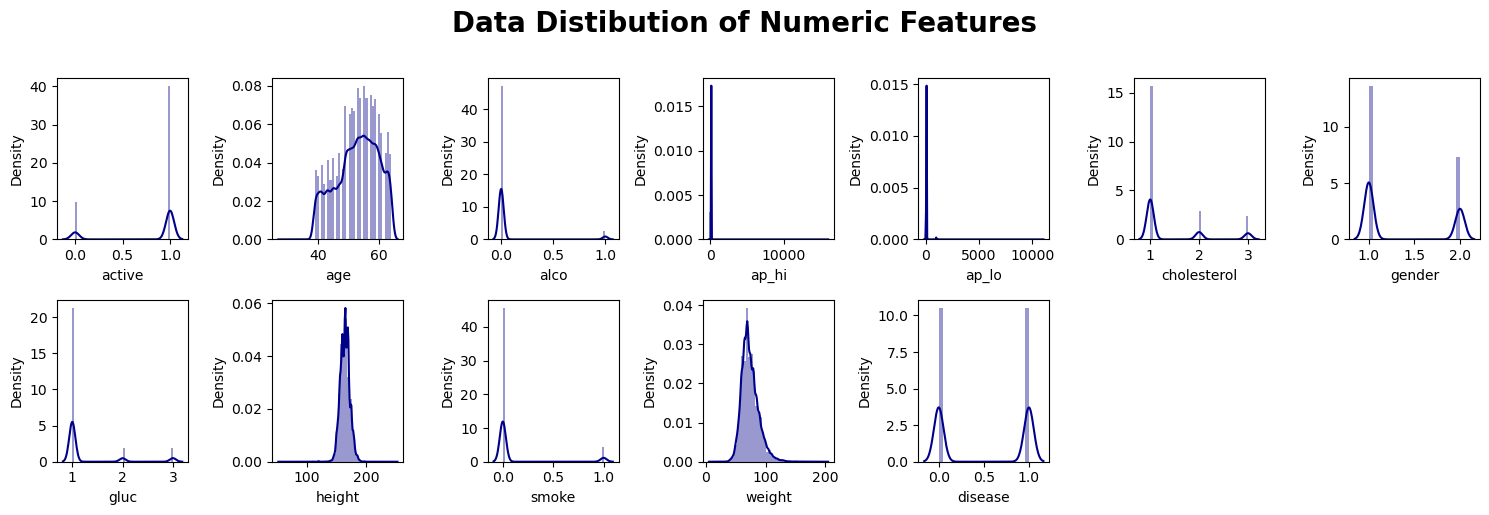

In [493]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Data Distibution of Numeric Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(num_col):
  plt.subplot(2, 7, i+1)                       

  # dist plots
  sns.distplot(data[col],color = 'darkblue')  
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()    
     

Text(0.5, 0, 'Active and non_active patient')

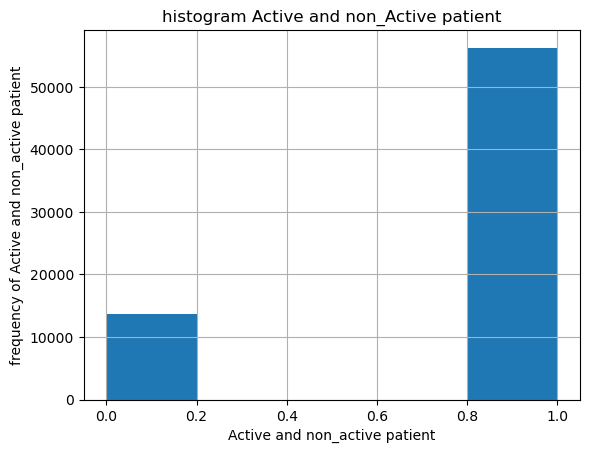

In [494]:

data['active'].hist(bins=5)
plt.title("histogram Active and non_Active patient")
plt.ylabel('frequency of Active and non_active patient')
plt.xlabel('Active and non_active patient')

<Axes: xlabel='cholesterol', ylabel='disease'>

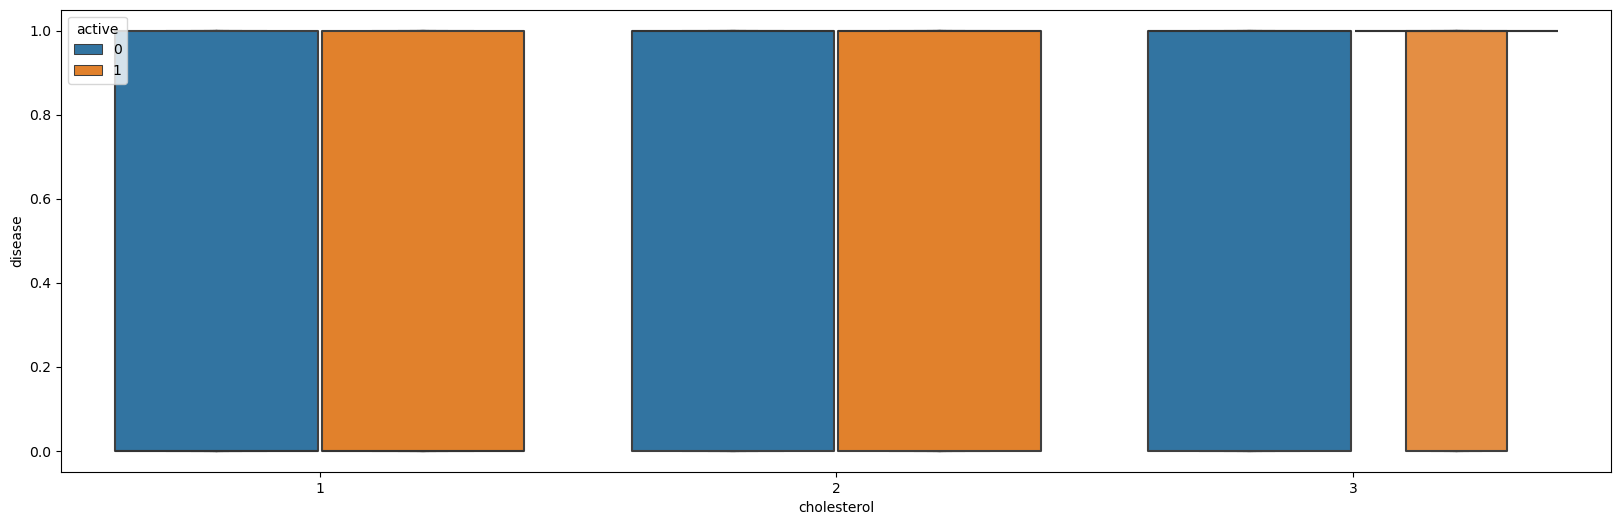

In [495]:
plt.figure(figsize=(20,6))
sns.boxenplot(data=data,x='cholesterol',y='disease',hue='active')

# Machine learning Prediction

In [496]:
# Prepare the data 
# data = data.head(200)

In [497]:
# Prepare the independent dataset (input)
 
x = data.drop(columns = ['country',  'occupation','disease'])


In [498]:
x.head(3)

,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight
0,1,50,0,110,80,1,2,1,168,0,62.0
1,1,55,0,140,90,3,1,1,156,0,85.0
2,0,51,0,130,70,3,1,1,165,0,64.0


In [499]:
# Prepare the dependent dataset (output)

y = data['disease']

In [500]:
y.head(2)

0    0
1    1
Name: disease, dtype: int64

In [501]:
#  Create the models

models = {
    "Logistic Regression": LogisticRegression(),
     "KNeighbor": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "xgb" : XGBClassifier()

    
}


In [502]:
# Split the model into test and training data 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [503]:
scale= StandardScaler()    
x_train= scale.fit_transform(x_train)    
x_test= scale.transform(x_test) 


In [504]:
x_train

array([[ 0.49410558,  0.91083466, -0.24087574, ..., -1.26391038,
        -0.31207962,  0.40466598],
       [-2.02385896, -1.1561044 , -0.24087574, ..., -0.28679781,
        -0.31207962, -0.29166369],
       [ 0.49410558,  0.61555765, -0.24087574, ...,  1.17887105,
        -0.31207962,  1.24026159],
       ...,
       [ 0.49410558,  1.64902718, -0.24087574, ...,  0.56817569,
        -0.31207962, -0.01313182],
       [-2.02385896, -0.56555038, -0.24087574, ...,  0.32389755,
        -0.31207962, -0.29166369],
       [ 0.49410558, -1.74665841, -0.24087574, ...,  1.54528826,
        -0.31207962, -0.7094615 ]])

In [505]:
x_test

array([[ 0.49410558,  0.91083466, -0.24087574, ..., -1.01963223,
        -0.31207962, -0.7094615 ],
       [ 0.49410558,  0.91083466, -0.24087574, ...,  0.69031476,
        -0.31207962,  0.75283082],
       [ 0.49410558,  1.50138868, -0.24087574, ..., -1.63032759,
        -0.31207962,  1.10099566],
       ...,
       [-2.02385896,  1.20611167, -0.24087574, ...,  0.07961941,
        -0.31207962, -0.57019556],
       [ 0.49410558,  0.02500364, -0.24087574, ..., -0.89749316,
        -0.31207962,  1.03136269],
       [-2.02385896, -0.41791188, -0.24087574, ...,  1.42314919,
         3.20431048,  0.61356489]])

In [506]:
for k,v in models.items():
    v.fit(x_train,y_train)
    print(k + " Trained !")

Logistic Regression Trained !
KNeighbor Trained !
Decision Tree Trained !
Random Forest Trained !
xgb Trained !


In [507]:
# Accuracy and F1 Score
    
for m,n in models.items():
    prediction = n.predict(x_test)
    acc = accuracy_score(y_test,prediction)
    f1 = f1_score(y_test,prediction,pos_label= 1)
    print(m + " Accuracy : {:.2f}%".format(acc*100))
    print(m + " F1 score: {:.2f}%".format(f1 * 100))


Logistic Regression Accuracy : 72.27%
Logistic Regression F1 score: 71.05%
KNeighbor Accuracy : 65.33%
KNeighbor F1 score: 64.66%
Decision Tree Accuracy : 63.58%
Decision Tree F1 score: 63.10%
Random Forest Accuracy : 70.74%
Random Forest F1 score: 70.67%
xgb Accuracy : 73.69%
xgb F1 score: 72.69%


In [508]:
# Accuracy,recall and percision Score

mod_cal = []
for mod,v in models.items():
    prediction = v.predict(x_test)
    accuracy = accuracy_score(y_test,prediction)
    
    precision = metrics.precision_score(y_test, prediction)
    recall = metrics.recall_score(y_test, prediction)
    mod_cal.append(accuracy)
    
    print(mod +" " + f"Accuracy ((TP+TN)/Total): {round(accuracy,2)}")
    print(mod +" " + f"Precision (TP/Predicted 1): {round(precision, 2)}")
    print( mod +" "+ f"Recall (TP/Actual 1): {round(recall,2)}")


Logistic Regression Accuracy ((TP+TN)/Total): 0.72
Logistic Regression Precision (TP/Predicted 1): 0.74
Logistic Regression Recall (TP/Actual 1): 0.68
KNeighbor Accuracy ((TP+TN)/Total): 0.65
KNeighbor Precision (TP/Predicted 1): 0.66
KNeighbor Recall (TP/Actual 1): 0.63
Decision Tree Accuracy ((TP+TN)/Total): 0.64
Decision Tree Precision (TP/Predicted 1): 0.64
Decision Tree Recall (TP/Actual 1): 0.62
Random Forest Accuracy ((TP+TN)/Total): 0.71
Random Forest Precision (TP/Predicted 1): 0.71
Random Forest Recall (TP/Actual 1): 0.7
xgb Accuracy ((TP+TN)/Total): 0.74
xgb Precision (TP/Predicted 1): 0.76
xgb Recall (TP/Actual 1): 0.7


<Axes: >

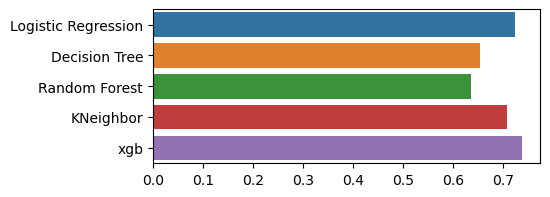

In [509]:
model_name=['Logistic Regression','Decision Tree','Random Forest','KNeighbor','xgb']
plt.figure(figsize = (5,2))
sns.barplot(x = mod_cal, y = model_name)


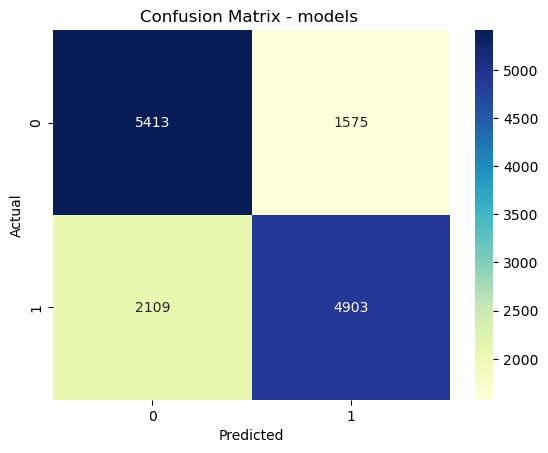

In [510]:
# ---------Confusion Matrix Visualization----------------

sns.heatmap(confusion_matrix(y_test,prediction), annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - models ')
plt.show()SS

# Due to high volume of the dataset, about (70000)rows,  A sample of (200)rows from the large dataset was used below for proper and clear visualization of the models.

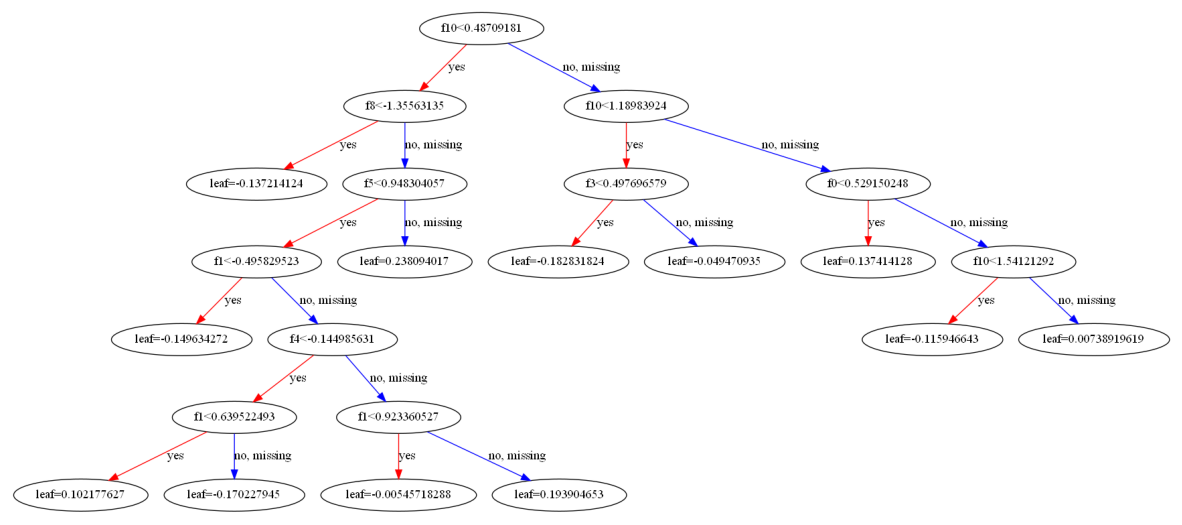

In [457]:
# visualizing the dataset with XGBOOT MODEL

plot_tree(models["xgb"], num_trees= 15, n_first_tree = 2)
plt.gcf().set_size_inches(15, 100)
plt.savefig('C:\\Users\\BOOK\\Downloads\\XGBOOTHealth.png')
plt.show()

In [436]:
# visualizing the dataset with decision tree MODEL


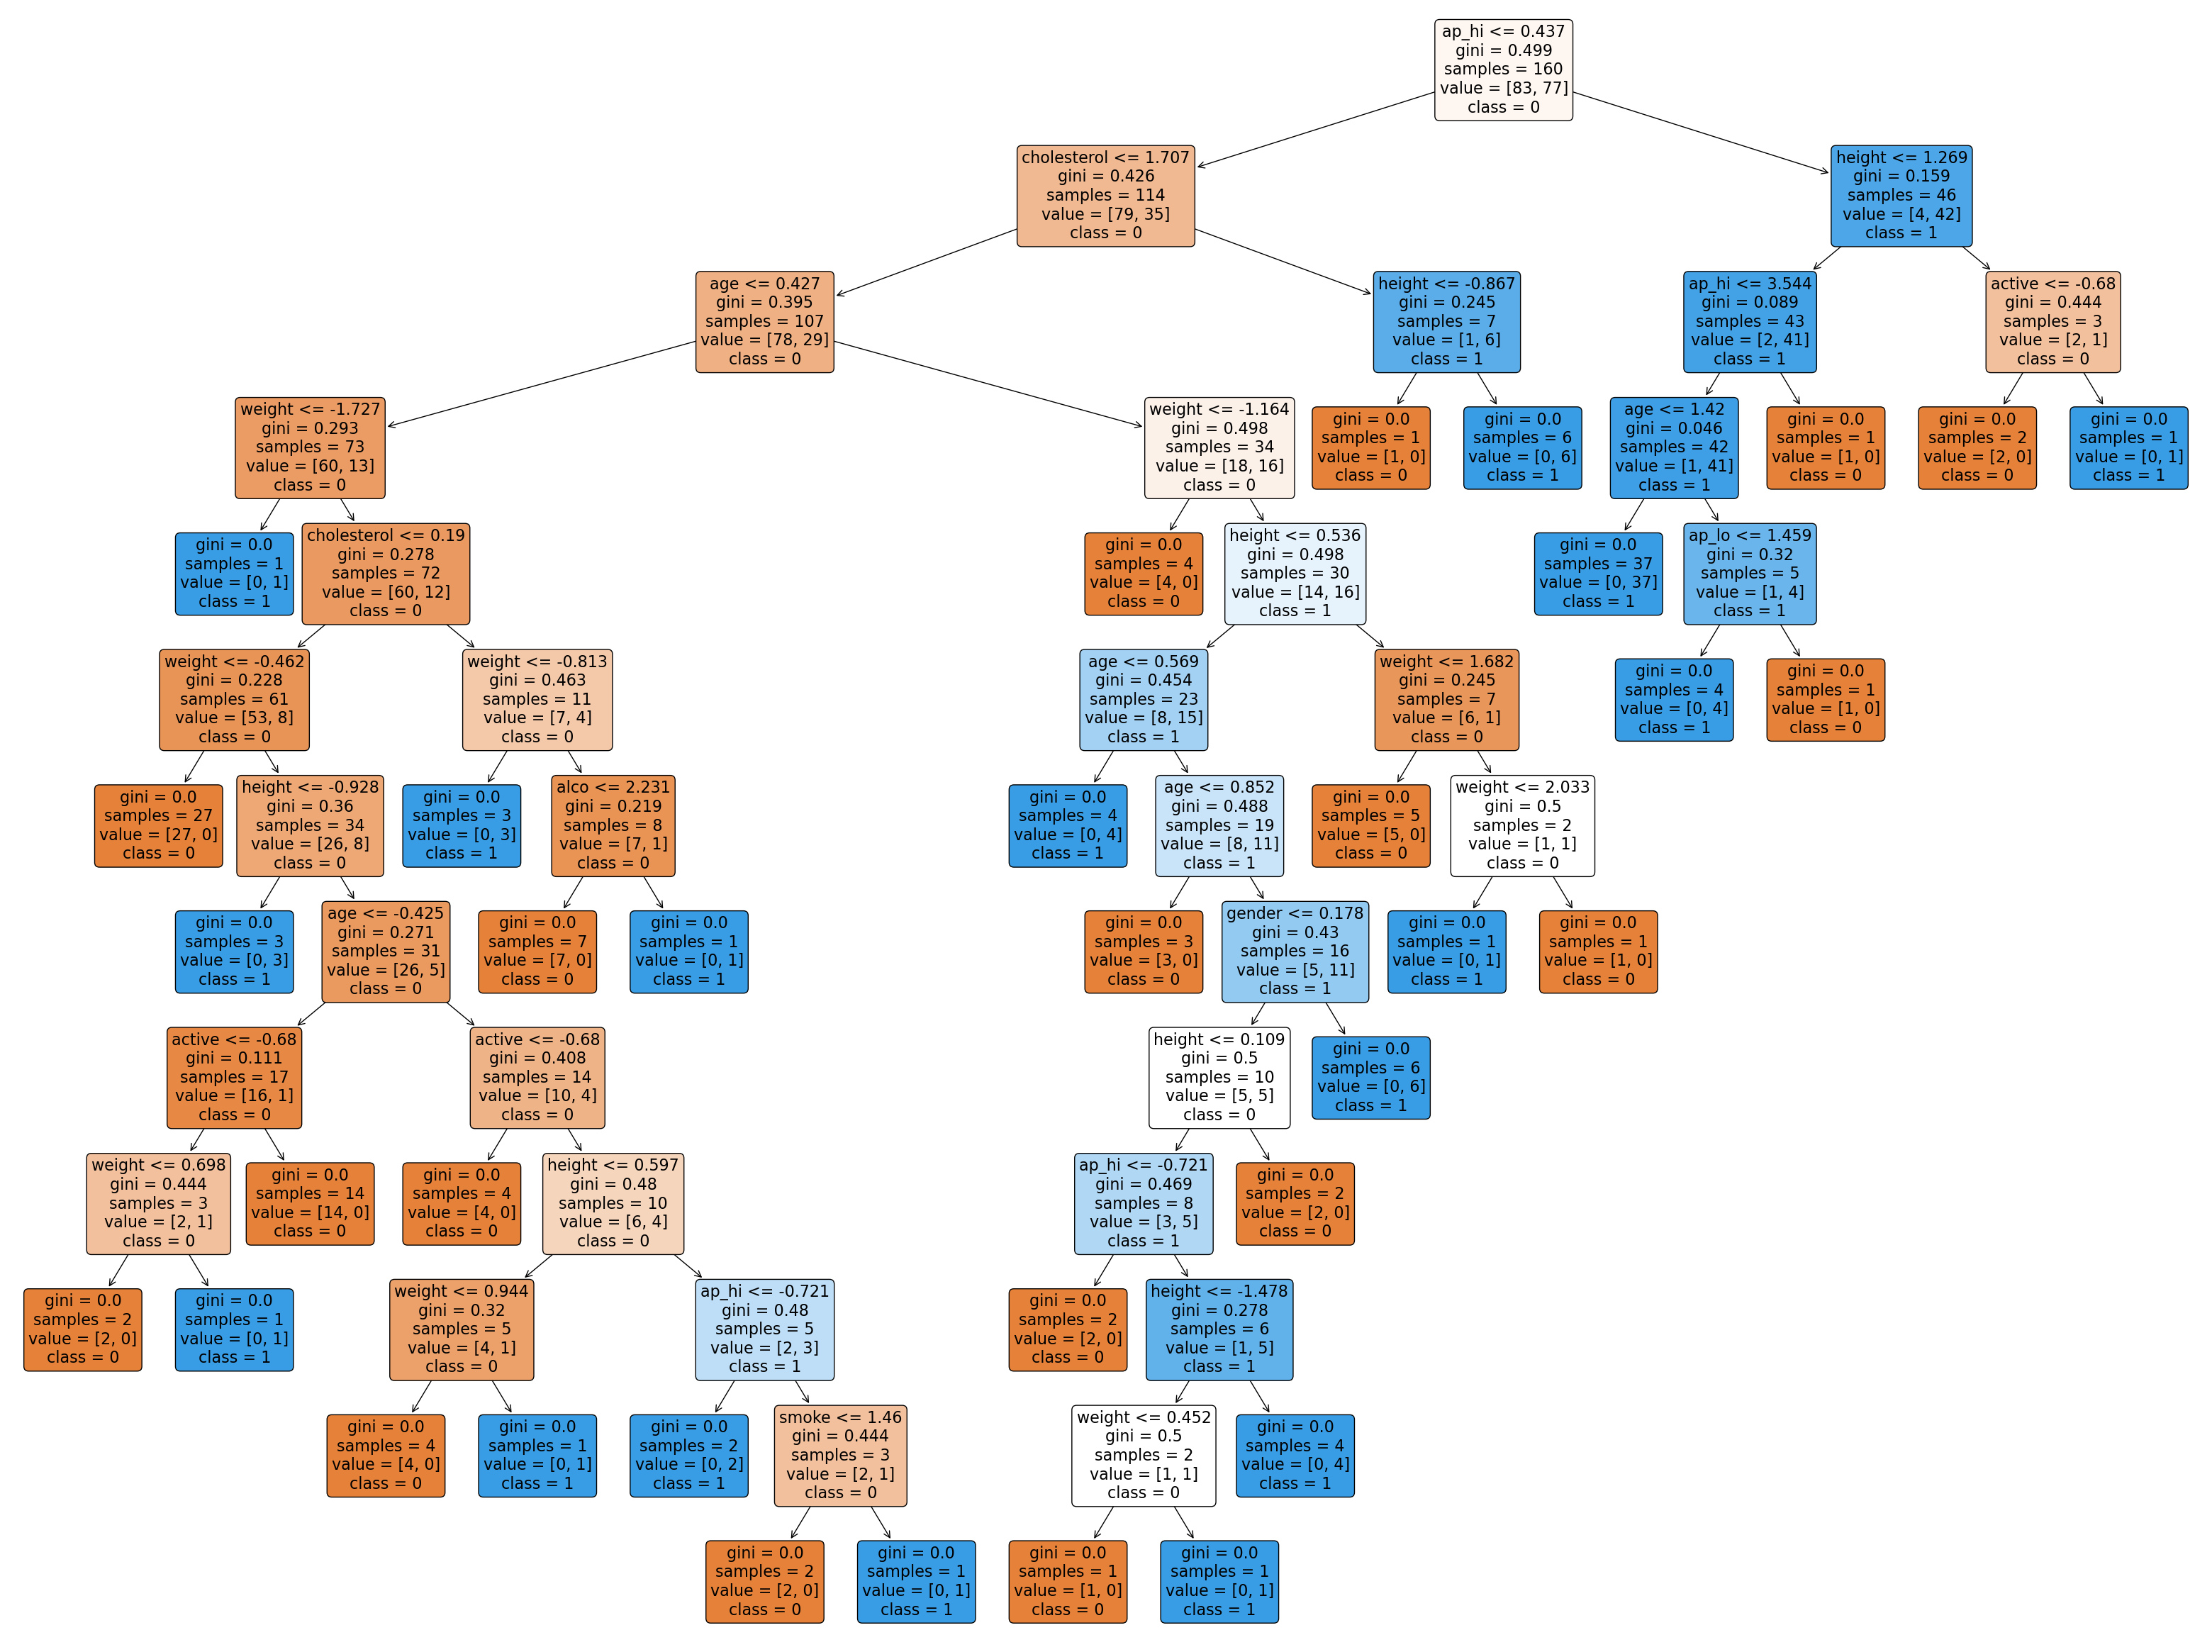

In [367]:
plt.figure(figsize=(40,30))
dtree_plot = tree.plot_tree(models['Decision Tree'],
        feature_names  =  ['active', 'age', 'alco', 'ap_hi', 'ap_lo', 'cholesterol', 'gender', 
                           'gluc', 'height', 'smoke', 'weight'],
        class_names = np.array(sorted(y.unique())).astype('str').tolist(), label="all", rounded=True,
                    
        filled = True,fontsize = 16)
plt.savefig('C:\\Users\\BOOK\\Downloads\\DecisionHealth.png')

plt.show()

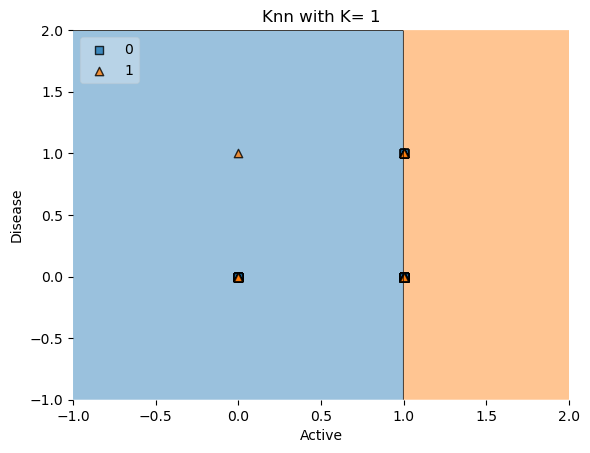

In [292]:
# the Decision Boundary

from mlxtend.plotting import plot_decision_regions

x = data[['active','smoke']].values
y = data['disease'].astype(int).values
clf = KNeighborsClassifier()
clf.fit(x, y)

plot_decision_regions(x,y,clf=clf,legend=2)    
plt.xlabel('Active')
plt.ylabel('Disease')
plt.title('Knn with K= 1')
plt.show()
